# Integrals (data)


## Example:

Recall the example of evolving mixed fractions of pigments in a wind-cloud simulation.


We have three mixing fractions (one for each pigment) versus time, and we want to calculate:

1) the rate at which the pigments mix, and

2) the total amount of mixed mass of each pigment evaluated from such rate.

3) compare that to the actual amount of mixed mass at the final time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("simulation_data_hw1.txt", sep = "\s+")

In [3]:
print(df)

        Time  MixedMass1  MixedMass2  MixedMass3
0   0.000000    0.000000    0.000000    0.000000
1   0.099800    0.024878    0.000000    0.024878
2   0.199956    0.030227    0.039161    0.050699
3   0.299681    0.039424    0.831349    0.693602
4   0.399916    0.056870    1.259453    1.030902
..       ...         ...         ...         ...
81  8.099956    4.622937   20.646380    8.763763
82  8.199907    5.035324   21.111130    8.756436
83  8.299865    5.456865   21.501670    8.721914
84  8.399680    5.874080   21.845740    8.669781
85  8.499951    6.259131   22.012070    8.606597

[86 rows x 4 columns]


In [4]:
time = np.array(df["Time"])

pigment1 = np.array(df["MixedMass1"])
pigment2 = np.array(df["MixedMass2"])
pigment3 = np.array(df["MixedMass3"])

In [5]:
print(time.shape, pigment1.shape)

(86,) (86,)


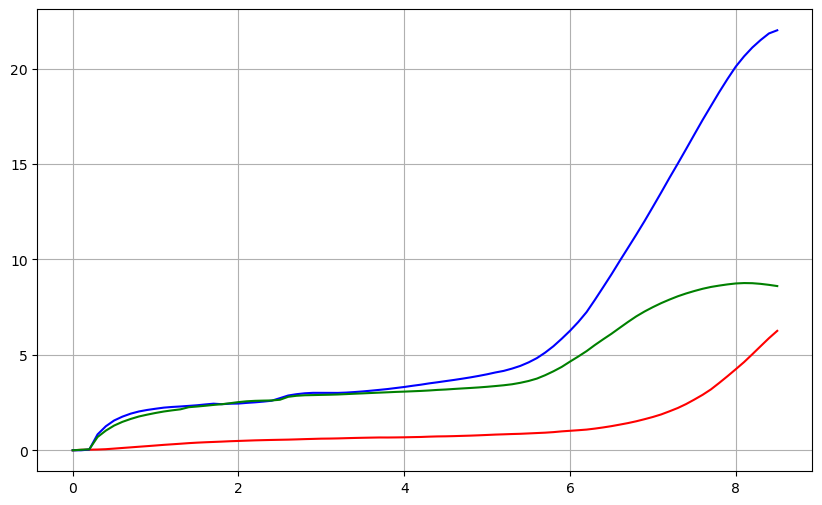

In [6]:
# Fig enviroment

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(time, pigment1, c='red')
ax.plot(time, pigment2, c='blue')
ax.plot(time, pigment3, c='green')

plt.grid()

plt.show()

## Get rate of mixing:

In [7]:
dpigment1 = np.gradient(pigment1, time[1]-time[0], axis = 0)
dpigment2 = np.gradient(pigment2, time[1]-time[0], axis = 0)
dpigment3 = np.gradient(pigment3, time[1]-time[0], axis = 0)

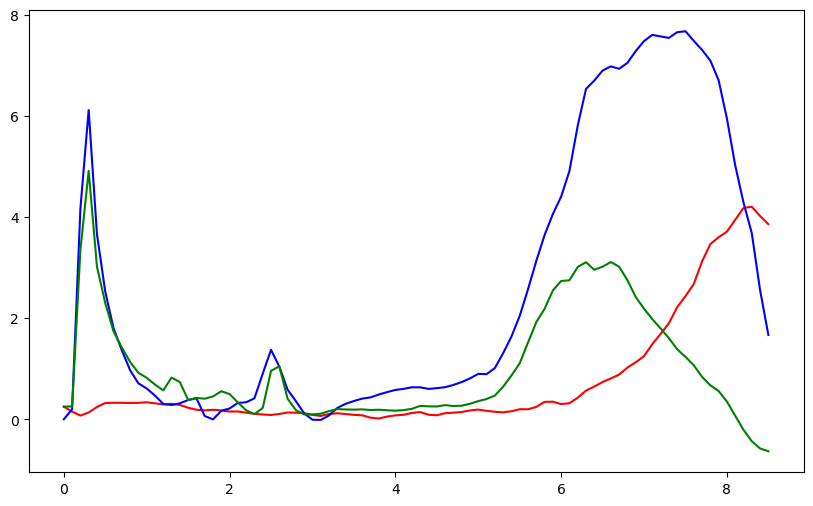

In [8]:
# Fig enviroment

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(time, dpigment1, c='red')
ax.plot(time, dpigment2, c='blue')
ax.plot(time, dpigment3, c='green')

plt.show()

## Get integral under curves:

In [9]:
import scipy as sc

from scipy import integrate

### Trapezoid method:

In [10]:
sc_trapezoid1 = sc.integrate.trapz(dpigment1,time)
sc_trapezoid2 = sc.integrate.trapz(dpigment2,time)
sc_trapezoid3 = sc.integrate.trapz(dpigment3,time)

In [11]:
print(sc_trapezoid1)
print(sc_trapezoid2)
print(sc_trapezoid3)

6.272066740479672
22.05621029467118
8.623665485850836


### Actual numbers:

In [12]:
print(pigment1.size)

86


In [13]:
print(pigment1[85])
print(pigment2[85])
print(pigment3[85])

6.259131
22.01207
8.606597


In [14]:
print(sc_trapezoid1)
print(sc_trapezoid2)
print(sc_trapezoid3)

6.272066740479672
22.05621029467118
8.623665485850836


### Simpson method:

In [15]:
sc_simpson1 = sc.integrate.simpson(dpigment1,time)
sc_simpson2 = sc.integrate.simpson(dpigment2,time)
sc_simpson3 = sc.integrate.simpson(dpigment3,time)

In [16]:
print(sc_simpson1)
print(sc_simpson2)
print(sc_simpson3)

6.2725721323044885
22.06520788457002
8.624153080110892
